<a href="https://colab.research.google.com/github/pthomas000/Adv_Data_Analysis/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Step 1: Load data, testing / training split 
#### [X] Testing and training data should be balanced
#### [X] Data cleaned, missing values addressed
#### [X] All appropriate variables are converted to categorical (as ordinal or one hot)
#### [X] Any necessary feature scaling should be performed
#### [X] Only work on training set!

import os
!pip install mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# Import data
df = pd.read_csv (r'/content/sample_data/data(1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [59]:
# Assign target
y = df['diagnosis']
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [60]:
# Assign features
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']]
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  symmetry_mean  fractal_d

In [61]:
feature_names = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']

In [62]:
# from sklearn.model_selection import train_test_split

# # split data and labels into a training and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [63]:
# Try shuffled stratified split 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train_shuffled = X.iloc[train_index]
    X_test_shuffled = X.iloc[test_index]
    y_train_shuffled = y.iloc[train_index]
    y_test_shuffled = y.iloc[test_index]

In [64]:
df.isnull().values.any()

True

In [65]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train_shuffled)
SimpleImputer()
X_train_new_s = imp_mean.transform(X_train_shuffled)
X_test_new_s = imp_mean.transform(X_test_shuffled)

In [66]:
X_train_shuffled.isnull().values.any()

False

In [67]:
X_test_shuffled.isnull().values.any()

False

In [68]:
#### Feature scaling
%matplotlib inline 
import matplotlib.pyplot as plt 

# plt.boxplot(X_train_shuffled)
# plt.yscale("symlog")
# plt.xlabel("Feature index")
# plt.ylabel("Feature magnitude")

In [69]:
min_on_training = X_train_shuffled.min(axis=0)

range_on_training = (X_train_shuffled - min_on_training).max(axis=0)

X_train_scaled = (X_train_shuffled - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 radius_mean               0.0
texture_mean              0.0
perimeter_mean            0.0
area_mean                 0.0
smoothness_mean           0.0
compactness_mean          0.0
concavity_mean            0.0
symmetry_mean             0.0
fractal_dimension_mean    0.0
dtype: float64
Maximum for each feature
 radius_mean               1.0
texture_mean              1.0
perimeter_mean            1.0
area_mean                 1.0
smoothness_mean           1.0
compactness_mean          1.0
concavity_mean            1.0
symmetry_mean             1.0
fractal_dimension_mean    1.0
dtype: float64


In [70]:
X_test_scaled = (X_test_shuffled - min_on_training) / range_on_training

In [71]:
from sklearn.svm import SVC

svmRBFScaled = SVC(kernel='rbf', C=1000000, gamma=0.01).fit(X_train_scaled, y_train_shuffled)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFScaled.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(svmRBFScaled.score(X_test_scaled, y_test_shuffled)))

Scaled Features
Accuracy on training set: 0.974
Accuracy on test set: 0.974


In [72]:
# Step 2: PCA for feature selection

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [73]:
!pip install mglearn
import mglearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0, 0.5, 'Second principal component')

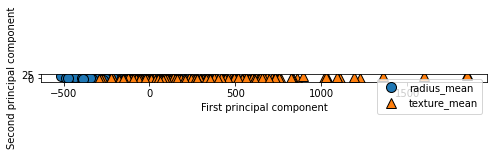

In [74]:
#UNSCALED features— PCA

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(X)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y)
plt.legend(feature_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

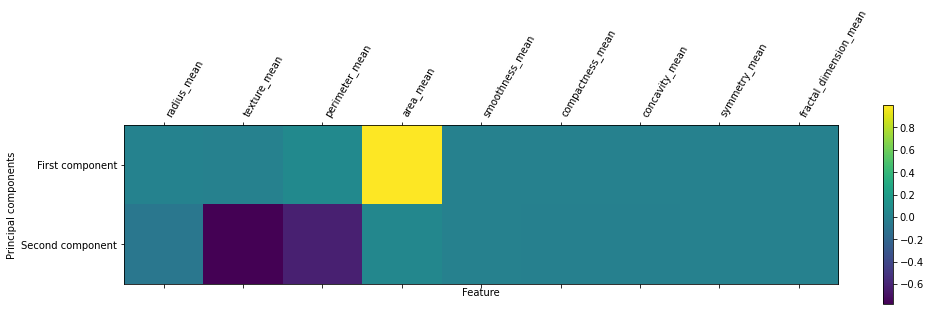

In [75]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),
           feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Second principal component')

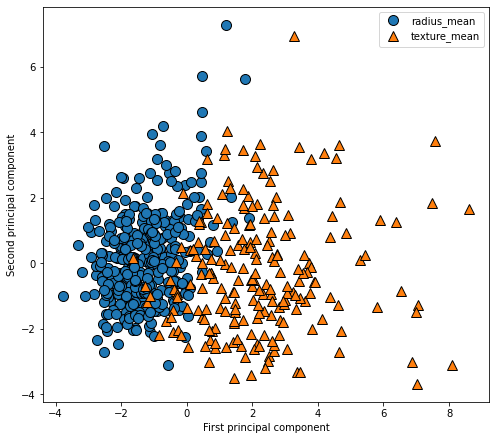

In [76]:
# SCALED features— PCA

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y)
plt.legend(feature_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

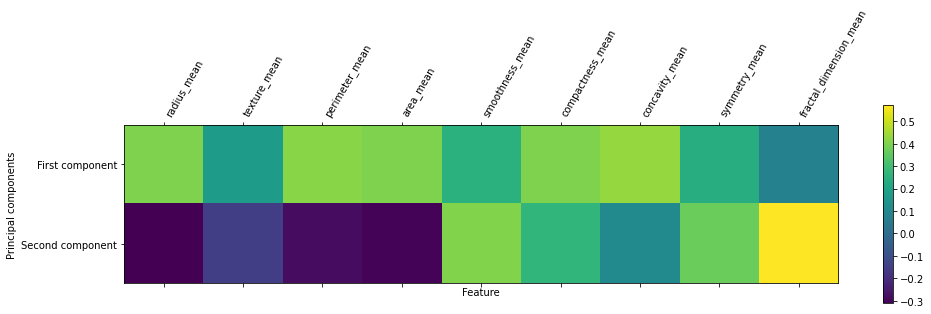

In [77]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),
           feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [78]:
# keep all the principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[5.03388203e-01 2.79836282e-01 9.73004889e-02 5.51096801e-02
 4.13893623e-02 1.29559852e-02 8.74957242e-03 1.23898650e-03
 3.14387860e-05]


In [79]:
#### [ ] Show how many features you need to maintain 95% of variance

# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.5033882  0.27983628 0.09730049 0.05510968 0.04138936]


In [80]:
# No PCA Pre-processing 

from sklearn.metrics import classification_report

svmRBFScaled.fit(X_train_scaled, y_train_shuffled)

print("Accuracy on training set: {:.3f}".format(svmRBFScaled.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(svmRBFScaled.score(X_test_scaled, y_test_shuffled)))
print(classification_report(y_test_shuffled, svmRBFScaled.predict(X_test_scaled),
                            target_names=["class 1", "class 2"]))

Accuracy on training set: 0.974
Accuracy on test set: 0.974
              precision    recall  f1-score   support

     class 1       0.97      0.99      0.98        72
     class 2       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [81]:
#### [ ] Evaluate whether this improves your best performing model from Project 2

# Two Principle Components

# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)
# transform data onto the first two principal components
X2_pca2 = pca2.transform(X_scaled)

for train_index, test_index in split.split(X_scaled, y):
    X2_train = X2_pca2[train_index]
    X2_test = X2_pca2[test_index]
    y2_train = y[train_index]
    y2_test = y[test_index]

#model=LogisticRegression().fit(X2_train, y2_train)
model = SVC(kernel='rbf', C=1000000, gamma=0.01).fit(X2_train, y2_train)

print("Accuracy on training set: {:.2f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.92


In [82]:
#### [ ] Evaluate whether this improves your best performing model from Project 2

# Two principle Components— 95% of the Variance; improved fit on training, not on testing

# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X_scaled)

for train_index, test_index in split.split(X_scaled, y):
    X3_train = X2_pca4[train_index]
    X3_test = X2_pca4[test_index]
    y3_train = y[train_index]
    y3_test = y[test_index]
    
#model=LogisticRegression().fit(X2_train, y2_train)
model = SVC(kernel='rbf', C=1000000, gamma=0.01).fit(X3_train, y3_train)

print("Accuracy on training set: {:.2f}".format(model.score(X3_train, y3_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X3_test, y3_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.92


In [83]:
# Step 3: Apply 3 types of clustering on your data; visualize output of each WITH & WITHOUT PCA run on it first. 
# Calculate both ARI & Silhouette coefficient for all six combos

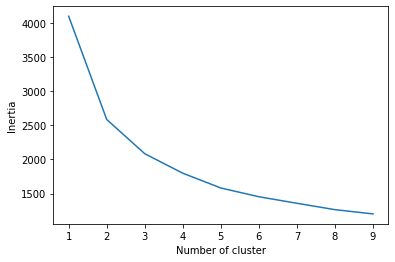

In [84]:
#### [ ] k-Means (use an elbow visualization to determine the optimal number of clusters) with PCA
#### [] Evaluate
from sklearn.cluster import KMeans

inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X3_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

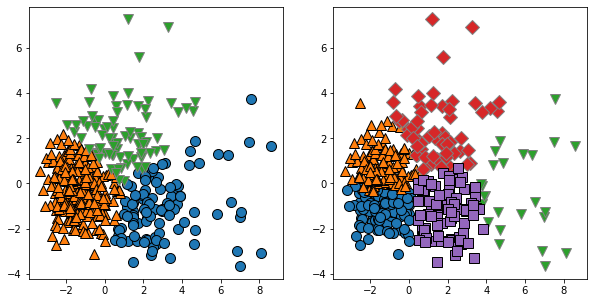

In [85]:
# kmeans2 = KMeans(n_clusters=3)
# kmeans2.fit(X3_train)

# mglearn.discrete_scatter(X3_train[:, 9], X3_train[:, 11], kmeans2.labels_, markers='o')
# plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
# plt.xlabel("Feature 9")
# plt.ylabel("Feature 11")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X3_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X3_train[:, 0], X3_train[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X3_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X3_train[:, 0], X3_train[:, 1], assignments, ax=axes[1])

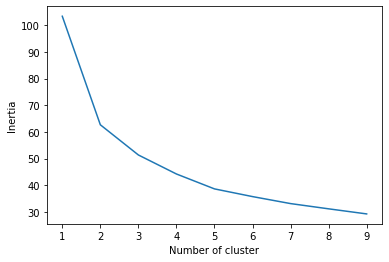

In [86]:
#### [ ] k-Means (use an elbow visualization to determine the optimal number of clusters) without PCA
#### [] Evaluate

from sklearn.cluster import KMeans

inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train_scaled)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

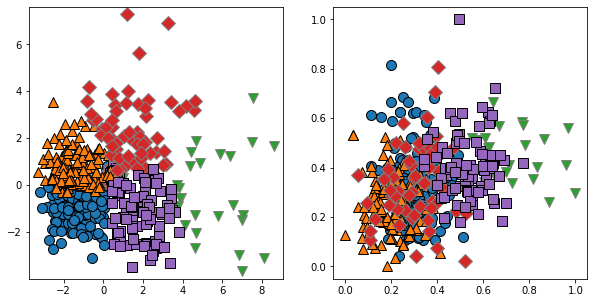

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using three cluster centers:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X_train_scaled)
assignments2=kmeans.labels_

mglearn.discrete_scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], assignments2, ax=axes[0])
mglearn.discrete_scatter(X3_train[:, 0], X3_train[:, 1], assignments2, ax=axes[0])


# using five cluster centers:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(X_train_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], assignments2, ax=axes[1])

Text(0, 0.5, 'Feature 1')

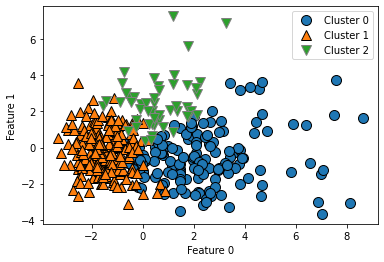

In [88]:
#### [ ] Agglomerate / Hierarchical with PCA
#### [] Evaluate

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X3_train)

mglearn.discrete_scatter(X3_train[:, 0], X3_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

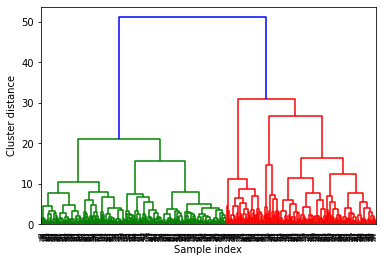

In [89]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X3_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

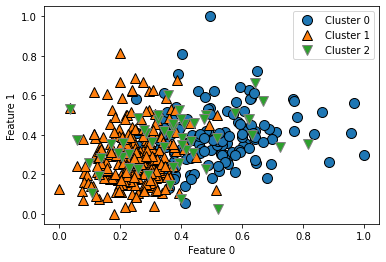

In [90]:
#### [ ] Agglomerate / Hierarchical without PCA
#### [] Evaluate

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_scaled)

mglearn.discrete_scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

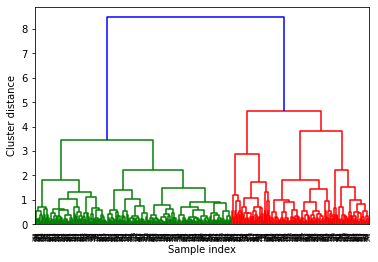

In [91]:
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train_scaled)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

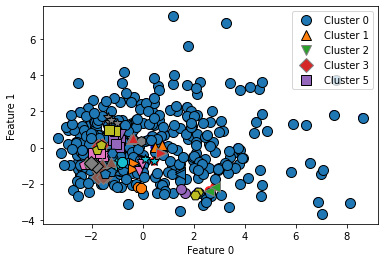

In [92]:
#### [ ] DBSCAN with PCA
#### [] Evaluate

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X3_train)

# plot the cluster assignments
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X3_train[:, 0], X3_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



Text(0, 0.5, 'Feature 1')

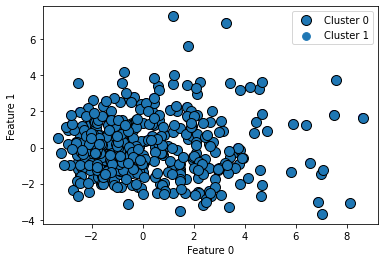

In [93]:
dbscan = DBSCAN(min_samples=5,eps=0.3)
clusters = dbscan.fit_predict(X3_train)

# plot the cluster assignments
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X3_train[:, 0], X3_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

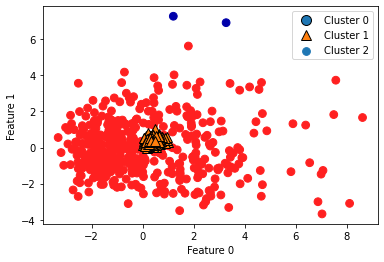

In [105]:
#### [ ] DBSCAN without PCA
#### [] Evaluate

dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train_scaled)

# plot the cluster assignments
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

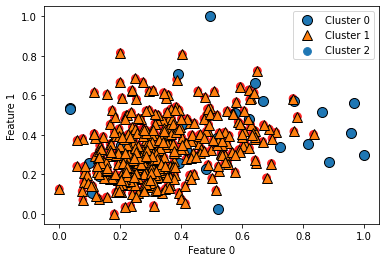

In [106]:
dbscan = DBSCAN(min_samples=5,eps=0.3)
clusters = dbscan.fit_predict(X_train_scaled)

# plot the cluster assignments
plt.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

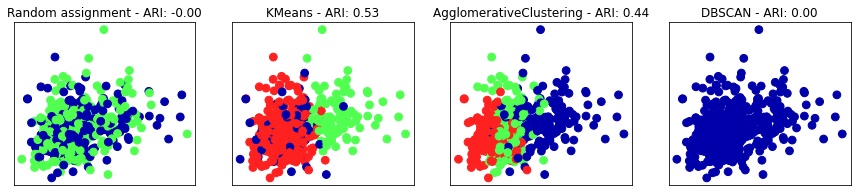

In [94]:
# Evaluate with Ground Truth— ARI (shuffled and then standard scale -> without PCA)

from sklearn.metrics.cluster import adjusted_rand_score

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train_shuffled)
X_scaled = scaler.transform(X_train_shuffled)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_shuffled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_shuffled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_shuffled, clusters)))


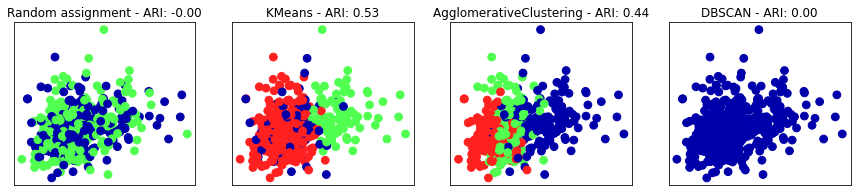

In [97]:
# Evaluate with Ground Truth— ARI (scaled and then standard scaler -> without PCA)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train_scaled)
X_scaled = scaler.transform(X_train_scaled)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_shuffled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_shuffled, clusters)))

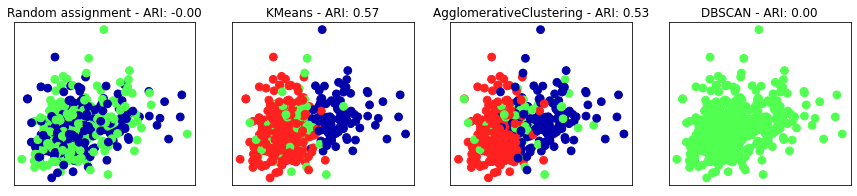

In [100]:
# Evaluate with Ground Truth— ARI (scaled, no standard scaler -> without PCA)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_shuffled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_scaled)
    ax.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_shuffled, clusters)))

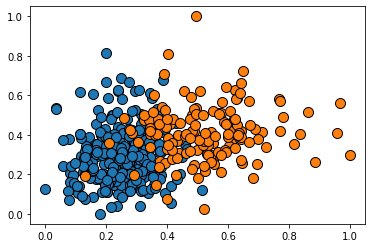

In [98]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(X_train_scaled, y_train_shuffled)
vals=model.predict(X_train_scaled)

mglearn.discrete_scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], vals, markers='o')

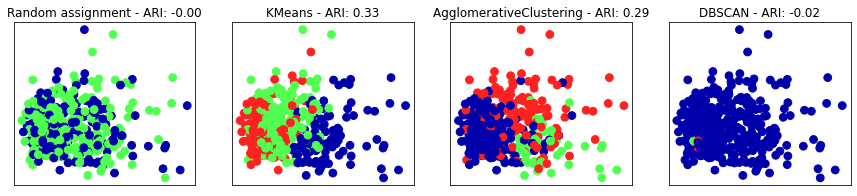

In [108]:
# Evaluate with Ground Truth— ARI (scaled and then standard scaler -> WITH PCA)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X3_train)
X_scaled = scaler.transform(X3_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_shuffled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_shuffled, clusters)))

ValueError: ignored

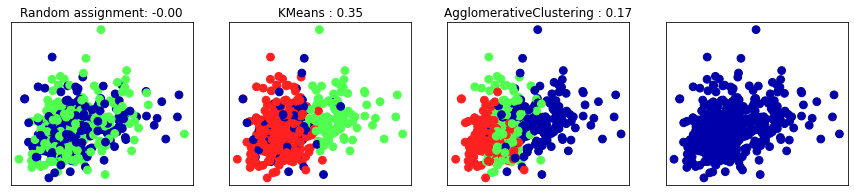

In [104]:
# Evaluate without Ground Truth— Silhouette Coefficient (shuffled, and then standard scaler -> without PCA)

from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train_shuffled)
X_scaled = scaler.transform(X_train_shuffled)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_shuffled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))


ValueError: ignored

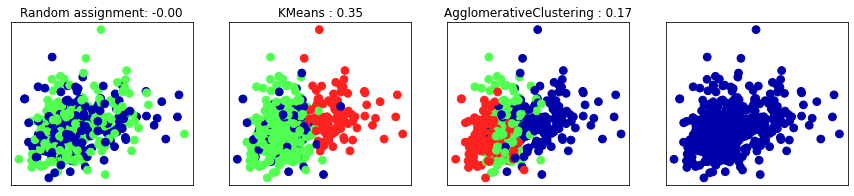

In [103]:
# Evaluate without Ground Truth— Silhouette Coefficient (scaled and then standard scaler -> without PCA)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train_scaled)
X_scaled = scaler.transform(X_train_scaled)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

ValueError: ignored

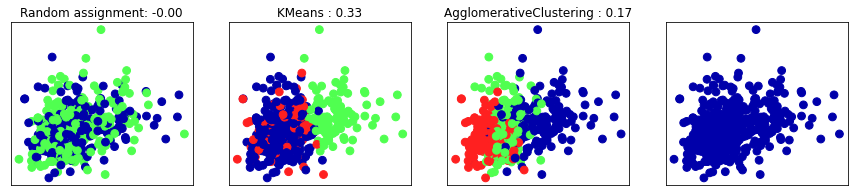

In [102]:
# Evaluate without Ground Truth— Silhouette Coefficient (scaled, no standard scaler -> without PCA)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

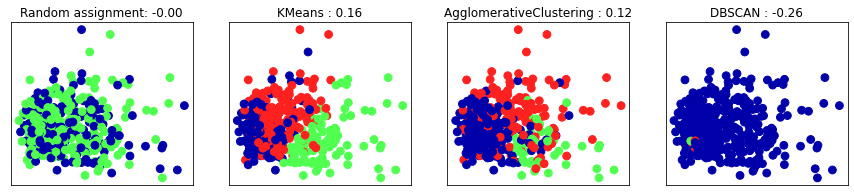

In [107]:
# Evaluate without Ground Truth— Silhouette Coefficient (scaled and then standard scaler -> WITH PCA)

from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X3_train)
X_scaled = scaler.transform(X3_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))